Code adapted from Zack Fizell

In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3/2}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3/2}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [4]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    r = np.sqrt((x ** 2 + y ** 2 + z **2))
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = -mu * x/ r ** 3
    y_ddot = -mu * y/ r ** 3
    z_ddot = -mu * z/ r ** 3
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [7]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [11]:
state_0 = [X_0, Y_0, Z_0, VX_0, VY_0, VZ_0]
t0 = 0
tf = 21600
n = 2000
time_array = np.linspace(t0, tf, n)
sol_RK45 = integrate.solve_ivp(model_2BP,(t0,tf),state_0,method='RK45', t_eval=time_array)

# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


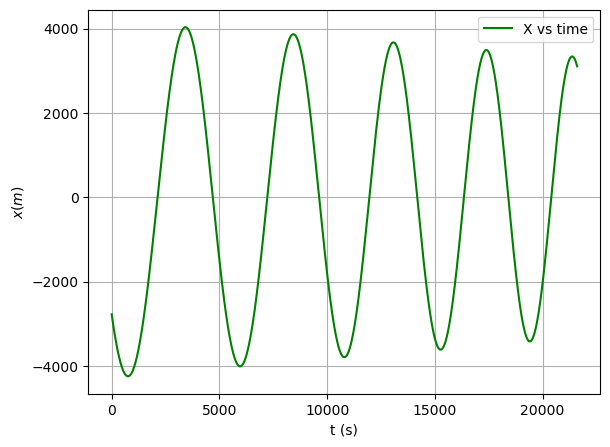

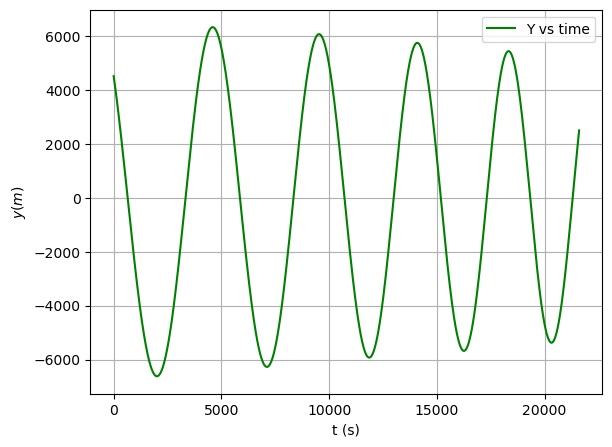

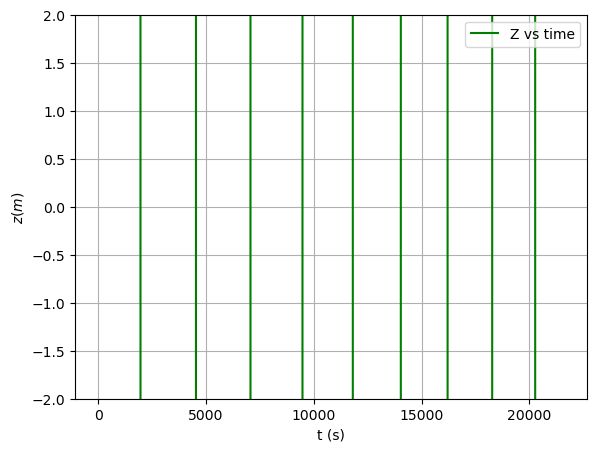

In [14]:
Xtime = plt.figure("X vs. time")
Ytime = plt.figure("Y vs. time")
Ztime = plt.figure("Z vs. time")

ax_Xt = Xtime.add_axes([0.1,0.1,0.8,0.8])
ax_Yt = Ytime.add_axes([0.1,0.1,0.8,0.8])
ax_Zt = Ztime.add_axes([0.1,0.1,0.8,0.8])

ax_Xt.plot(sol_RK45.t,sol_RK45.y[0],'g',label='X vs time')
ax_Yt.plot(sol_RK45.t,sol_RK45.y[1],'g',label='Y vs time')
ax_Zt.plot(sol_RK45.t,sol_RK45.y[2],'g',label='Z vs time')

ax_Xt.legend(loc='best')
ax_Xt.set_xlabel('t (s)')
ax_Xt.set_ylabel(r'$x (m)$')
plt.ylim(-2,2)
ax_Xt.grid();

ax_Yt.legend(loc='best')
ax_Yt.set_xlabel('t (s)')
ax_Yt.set_ylabel(r'$y (m)$')
plt.ylim(-2,2)
ax_Yt.grid();

ax_Zt.legend(loc='best')
ax_Zt.set_xlabel('t (s)')
ax_Zt.set_ylabel(r'$z (m)$')
plt.ylim(-2,2)
ax_Zt.grid();


# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


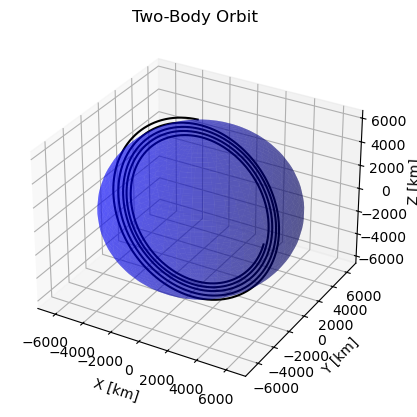

In [33]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

x_sat = sol_RK45.y[0]
y_sat = sol_RK45.y[1]
z_sat = sol_RK45.y[2]

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(x_sat, y_sat, z_sat, 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');
